# Regresion Líneal sencilla con Stats

## Relaciones lineales

Armemos una relación entre Celsius y Farenheit

In [1]:
def celsius_a_fahrenheit(c):
    return c * 9/5 + 32


Armemos una comprensión de lista con esta función para todas las temeperaturas del 0 al 100 de 10 en 10

In [2]:
celsius = list(range(0, 101, 10))


In [3]:
fahrenheit = [celsius_a_fahrenheit(c) for c in celsius]

Importa Pandas

In [4]:
import pandas as pd


Creamos un DataFrame con las listas

In [5]:
df = pd.DataFrame({
    'Celsius': celsius,
    'Fahrenheit': fahrenheit
})


Arma una gráfica que muestre esta relación

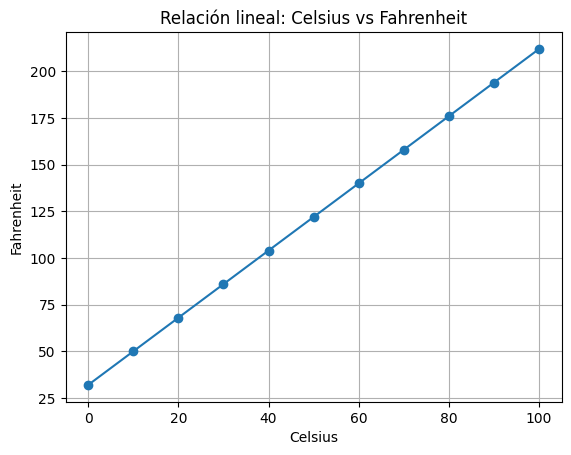

In [6]:
import matplotlib.pyplot as plt

plt.plot(df['Celsius'], df['Fahrenheit'], marker='o')  # línea con puntos
plt.xlabel('Celsius')
plt.ylabel('Fahrenheit')
plt.title('Relación lineal: Celsius vs Fahrenheit')
plt.grid(True)
plt.show()


Ponle etiquetas

y = mx + b

## Regresión lineal con King_county

Carga los datos de King county a un dataframe

In [7]:
import pandas as pd

df = pd.read_csv("kc_house_data.csv")

Veamos el Head

In [8]:
df.head()

,sqft,price
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Veamos el Tail

In [9]:
df.tail()

,sqft,price
21608,1530,360000.0
21609,2310,400000.0
21610,1020,402101.0
21611,1600,400000.0
21612,1020,325000.0


Vamos cambiando los titulos de columnas

In [10]:
df.rename(columns={"price": "PrecioVenta", "sqft": "Areafft"}, inplace=True)


Ceca tu nuevo head

In [11]:
df.head()

,Areafft,PrecioVenta
0,1180,221900.0
1,2570,538000.0
2,770,180000.0
3,1960,604000.0
4,1680,510000.0


Importa stats de scipy

In [12]:
from scipy import stats

Arma un modelo de regresión lineal

In [13]:
pendiente, intercepcion, r, p, std_err = stats.linregress(df['Areafft'], df['PrecioVenta'])

Chea la pendiente

In [14]:
print(f"Pendiente (m): {pendiente}")

Pendiente (m): 280.8066899295009


Checa la intercepción

In [15]:
print(f"Intersección (b): {intercepcion}")

Intersección (b): -43867.60153385613


In [16]:
print(f"Fórmula generada: PrecioVenta = {pendiente:.2f} * Areafft + {intercepcion:.2f}")

Fórmula generada: PrecioVenta = 280.81 * Areafft + -43867.60


PrecioVenta = 280.80*Areaft - 43,867.60

Vamos a predecir el precio de alguna casa

In [17]:
def predecir_precio(area):
    return pendiente * area + intercepcion

print(predecir_precio(2500))


658149.1232898962


In [18]:
df[df['Areafft'] == 2500]


,Areafft,PrecioVenta
286,2500,467000.0
342,2500,425000.0
349,2500,387000.0
529,2500,662000.0
911,2500,615000.0
...,...,...
19944,2500,650000.0
20208,2500,475000.0
20366,2500,635000.0
21048,2500,575000.0


Compara con la realidad

### Hacer la gráfica

Importa Seaborn

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt



Pon el estilo como Whitegrid

In [20]:
sns.set_style("whitegrid")  # estilo visual

Arma una regplot de sns

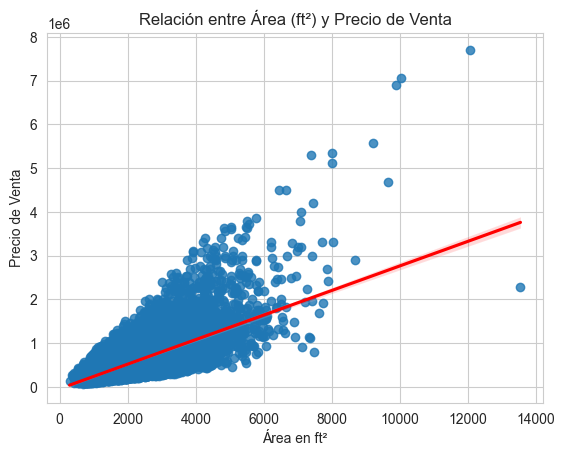

In [21]:
sns.regplot(x='Areafft', y='PrecioVenta', data=df, line_kws={"color": "red"})

plt.title("Relación entre Área (ft²) y Precio de Venta")
plt.xlabel("Área en ft²")
plt.ylabel("Precio de Venta")
plt.show()